## Q1 MLflow Version

In [2]:
!mlflow --version

mlflow, version 2.22.0


## Q2 Download and preprocess the data

In [3]:
!ls ./output | wc -l

4


## Q3 Train Model with AutoDog

In [5]:
!python train.py --data_path ./output

started
Fiting
Over


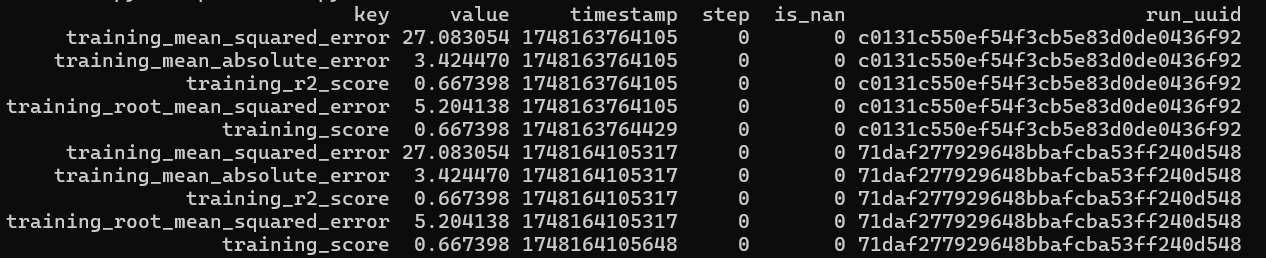

In [11]:
from IPython.display import Image
Image("Metrics.png")

## Q4  Launch the tracking server locally

In [13]:
!mlflow ui --backend-store-uri sqlite:////home/vrunbuntu/anaconda3/MLOPS-ZOOMCAMP/MLOPS-ZOOMCAMP/02-experiment-tracking/Homework/mlflow.db --default-artifact-root ./artifacts

[2025-05-25 09:48:28 +0000] [4509] [INFO] Starting gunicorn 23.0.0
[2025-05-25 09:48:28 +0000] [4509] [INFO] Listening at: http://127.0.0.1:5000 (4509)
[2025-05-25 09:48:28 +0000] [4509] [INFO] Using worker: sync
[2025-05-25 09:48:28 +0000] [4510] [INFO] Booting worker with pid: 4510
[2025-05-25 09:48:28 +0000] [4511] [INFO] Booting worker with pid: 4511
[2025-05-25 09:48:28 +0000] [4512] [INFO] Booting worker with pid: 4512
[2025-05-25 09:48:28 +0000] [4513] [INFO] Booting worker with pid: 4513
^C
[2025-05-25 09:49:06 +0000] [4509] [INFO] Handling signal: int
[2025-05-25 09:49:06 +0000] [4513] [INFO] Worker exiting (pid: 4513)
[2025-05-25 09:49:06 +0000] [4510] [INFO] Worker exiting (pid: 4510)
[2025-05-25 09:49:06 +0000] [4512] [INFO] Worker exiting (pid: 4512)
[2025-05-25 09:49:06 +0000] [4511] [INFO] Worker exiting (pid: 4511)


## Q5. Tune the hyperparameters of the model

In [14]:
!python hpo.py

2025/05/25 09:52:00 INFO mlflow.tracking.fluent: Experiment with name 'random-forest-hyperopt' does not exist. Creating a new experiment.
100%|██████████| 15/15 [01:04<00:00,  4.30s/trial, best loss: 5.335419588556921]


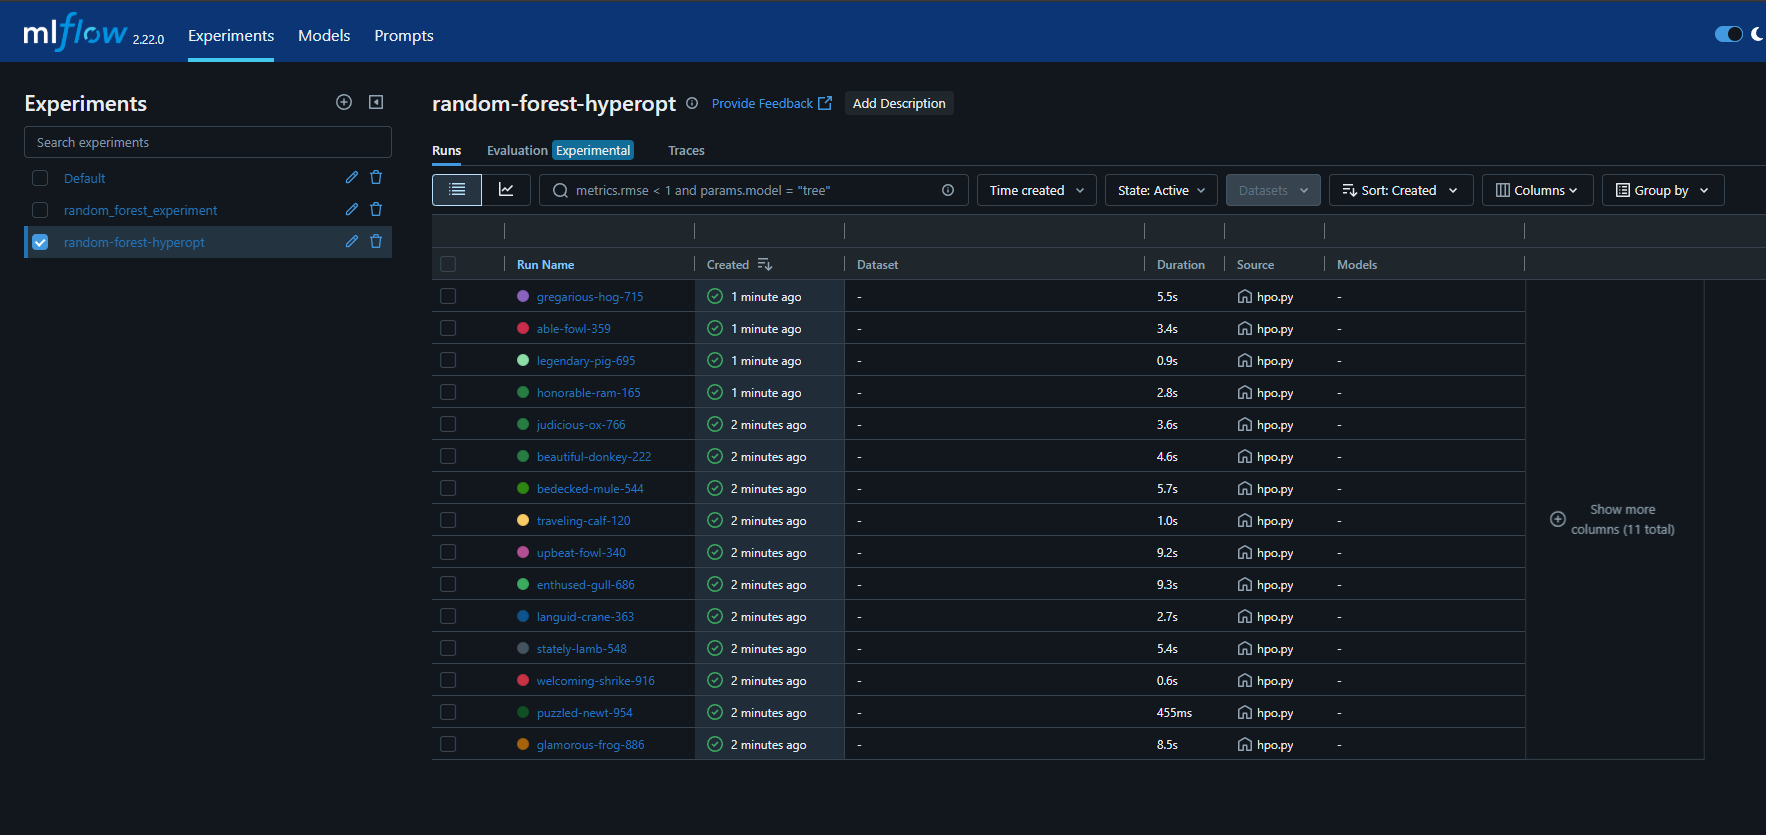

In [20]:
Image('HyperParameterTuning.png')

## Best Model RMSE is : 5.355041749098929

## Q6. Promote the best model to the model registry

In [22]:
!python register_model.py

Successfully registered model 'nyc-taxi-randomforest'.
Created version '1' of model 'nyc-taxi-randomforest'.


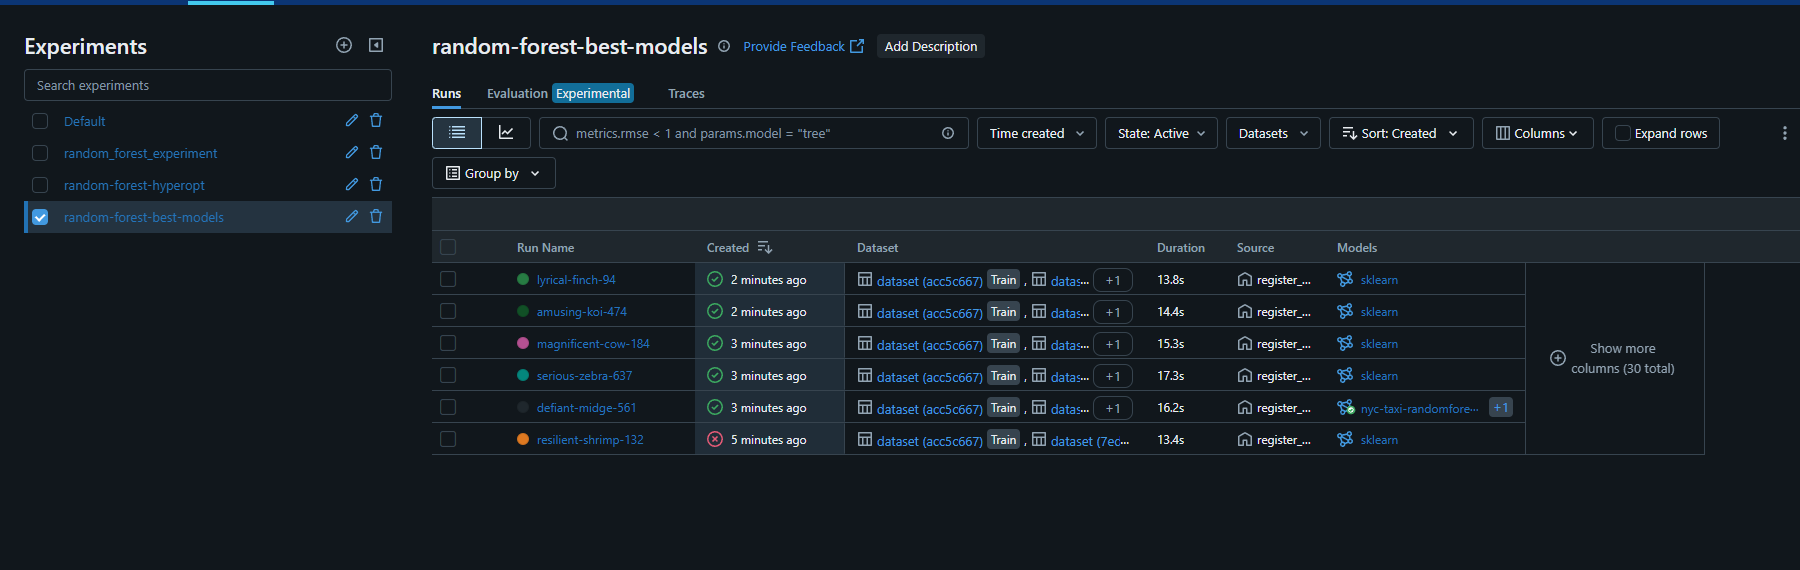

In [25]:
Image('BestModels.png')

## Best Model RMSE is: 5.5674

In [26]:
from mlflow.tracking import MlflowClient

# sqlite:////home/kaustubh/mlops_zoomcamp/Mlops-ZoomCamp/02_experiment-tracking/homework/mlflow.db
TRACKING_URI = "sqlite:////home/vrunbuntu/anaconda3/MLOPS-ZOOMCAMP/MLOPS-ZOOMCAMP/02-experiment-tracking/Homework/mlflow.db"


client = MlflowClient(tracking_uri=TRACKING_URI)

In [27]:
client.search_experiments()

[<Experiment: artifact_location='/home/vrunbuntu/anaconda3/MLOPS-ZOOMCAMP/MLOPS-ZOOMCAMP/02-experiment-tracking/Homework/mlruns/3', creation_time=1748167313978, experiment_id='3', last_update_time=1748167313978, lifecycle_stage='active', name='random-forest-best-models', tags={}>,
 <Experiment: artifact_location='/home/vrunbuntu/anaconda3/MLOPS-ZOOMCAMP/MLOPS-ZOOMCAMP/02-experiment-tracking/Homework/mlruns/2', creation_time=1748166720244, experiment_id='2', last_update_time=1748166720244, lifecycle_stage='active', name='random-forest-hyperopt', tags={}>,
 <Experiment: artifact_location='/home/vrunbuntu/anaconda3/MLOPS-ZOOMCAMP/MLOPS-ZOOMCAMP/02-experiment-tracking/Homework/mlruns/1', creation_time=1748163745014, experiment_id='1', last_update_time=1748163745014, lifecycle_stage='active', name='random_forest_experiment', tags={}>,
 <Experiment: artifact_location='/home/vrunbuntu/anaconda3/MLOPS-ZOOMCAMP/MLOPS-ZOOMCAMP/02-experiment-tracking/Homework/mlruns/0', creation_time=174816374499

In [28]:
experiment=client.get_experiment(experiment_id='2')

In [29]:
# Show experiment info
print(f"Name: {experiment.name}")
print(f"Experiment ID: {experiment.experiment_id}")
print(f"Artifact Location: {experiment.artifact_location}")
print(f"Lifecycle_stage: {experiment.lifecycle_stage}")

Name: random-forest-hyperopt
Experiment ID: 2
Artifact Location: /home/vrunbuntu/anaconda3/MLOPS-ZOOMCAMP/MLOPS-ZOOMCAMP/02-experiment-tracking/Homework/mlruns/2
Lifecycle_stage: active


In [30]:
from mlflow.entities import ViewType

runs = client.search_runs(
    experiment_ids='2',
    filter_string="",
    run_view_type=ViewType.ACTIVE_ONLY,
    max_results=20,
    order_by=["metrics.rmse ASC"]
)

In [31]:
for run in runs:
    print(f"run-id : {run.info.run_id}, rmse : {run.data.metrics}" , end="\n\n")

run-id : 4124c25121f14588a364db8bc7aa8eb6, rmse : {'rmse': 5.335419588556921}

run-id : 9b3a7da1bc434f998b04f2059ea03640, rmse : {'rmse': 5.354695072530291}

run-id : 6c8756a0fc30476eb84b7501e7f3ef14, rmse : {'rmse': 5.355041749098929}

run-id : 5a9ad70d38294e8ab7ed7a7eb0cf013c, rmse : {'rmse': 5.357490752366866}

run-id : 4e01f527e605457dbf642f6feb788380, rmse : {'rmse': 5.3633599989832135}

run-id : 8f7a573ee8dc45acb48d7fb4d049b101, rmse : {'rmse': 5.363707729018604}

run-id : 4d3028e822434d13840f2b60a99aff36, rmse : {'rmse': 5.370086069268862}

run-id : 059aa14a5d2d4e8c8b94e98489e688a2, rmse : {'rmse': 5.37159585587677}

run-id : c4e9708fcc854b5c9632ed64539ff8c7, rmse : {'rmse': 5.410518705423984}

run-id : f4658fecca6c4977b7470339e70c97fe, rmse : {'rmse': 5.4431408201543805}

run-id : 94e4a73ac6684ad1a9138903a6920122, rmse : {'rmse': 5.4646431328121015}

run-id : e780868743de4192b6ce041cc1849a09, rmse : {'rmse': 5.484068016681342}

run-id : f9c4869c3f854464842d2ae50ed91b53, rmse : 